In [1]:
import numpy as np
import matplotlib.pyplot as plt
from prysm.x.dm import DM
from prysm import coordinates, geometry

from poi.influence_funcs import gaussian_influence_function

# Defining the Deformable Mirror

In [2]:
Npup = 512
nact = 34
act_pitch = 0.5
samples_per_act = 8
sampling_pitch = act_pitch / samples_per_act

x, y = coordinates.make_xy_grid(Npup, dx=sampling_pitch)
rho, _ = coordinates.cart_to_polar(x, y)
influence_func = gaussian_influence_function(rho, sampling_pitch)

# Initializing the DM

In [3]:
dm = DM(influence_func, Nout=Npup, Nact=nact, sep=samples_per_act)

# Interacting with the DM

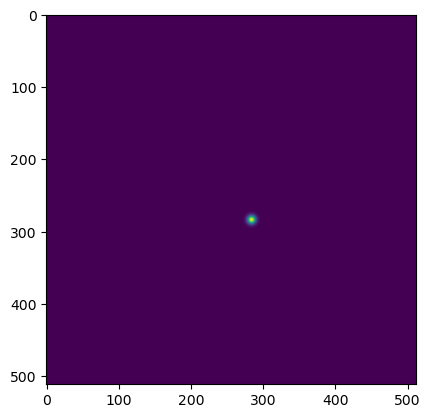

In [4]:
dm.actuators[20, 20] = 1
sfe = dm.render(wfe=False)
plt.imshow(sfe)

# Applying a polynomial to the DM

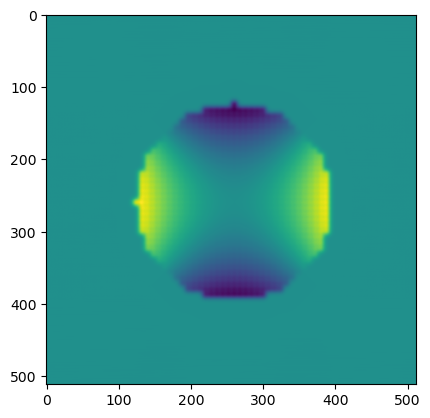

In [5]:
from prysm import polynomials
xx, yy = coordinates.make_xy_grid(nact, dx=2/nact)
r, t = coordinates.cart_to_polar(xx, yy)
mode = polynomials.zernike_nm(3, 2, r, t)
mask = geometry.circle(1, r)
mode[~mask] = 0
dm.actuators[:] = mode
plt.imshow(dm.render(False))

# Applying Hadamard Modes to the DM

In [9]:
from poi.modes import hadamard_modes_sequence
modes = hadamard_modes_sequence(mask)


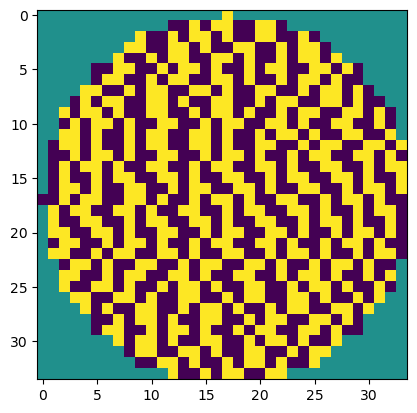

In [13]:
plt.imshow(modes[-1])

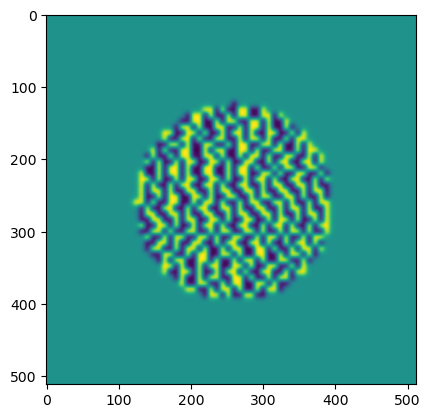

In [16]:
dm.actuators[:] = -modes[-1]
plt.imshow(dm.render(wfe=False))